In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 82.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 103.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 29.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd 
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from PIL import Image
from sklearn.utils import resample
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from transformers import RobertaTokenizer
from transformers import TFRobertaModel
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import Flatten
from sklearn.metrics import precision_recall_curve

import tensorflow as tf
from sklearn.metrics import roc_auc_score, roc_curve,auc
from keras import regularizers
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,f1_score,classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score
from itertools import cycle

lemma = WordNetLemmatizer()
stopword = set(STOPWORDS)
nltk.download('omw-1.4')
%matplotlib inline
import nltk
nltk.download('stopwords')
import nltk
nltk.download('wordnet')


from nltk.corpus import brown
nltk.download("brown")
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [ ]:
train_data=pd.read_csv("/content/drive/MyDrive/Info mining/traindata.csv")

In [ ]:
test_data=pd.read_csv("/content/drive/MyDrive/Info mining/testdata.csv")

In [ ]:
train_data.head()

,review,rating,split
0,ONT2 Amazon,0,train
1,Good company to work,1,train
2,Outbound Problem Solver,0,train
3,Very Friendly environment,1,train
4,Local Data Quality Evaluator - Geo EMEA,1,train


In [ ]:
#train_data['rating']=train_data['rating'].round().astype(int)
num_na = train_data['rating'].isna().sum()
print(num_na)

0


In [ ]:
test_data.head()

,review,rating,split
0,Associate,0,test
1,Associate,0,test
2,nice,1,test
3,MS Reiview,1,test
4,Average warehouse expectations,0,test


In [ ]:
new_column=["review","rating"]
train_data=train_data[new_column]
train_data=train_data.reindex(columns=new_column)

In [ ]:
train_data.head()

,review,rating
0,ONT2 Amazon,0
1,Good company to work,1
2,Outbound Problem Solver,0
3,Very Friendly environment,1
4,Local Data Quality Evaluator - Geo EMEA,1


In [ ]:
train_data['rating'].value_counts()

1    7200
0    7134
Name: rating, dtype: int64

In [ ]:
train_data_len = train_data['review'].str.len()
test_data_len = test_data['review'].str.len()

In [ ]:
print("Train Text Data Length is",train_data_len)

Train Text Data Length is 0        11
1        20
2        23
3        25
4        39
         ..
14329    17
14330    79
14331    30
14332     8
14333    27
Name: review, Length: 14334, dtype: int64


In [ ]:
print("Test Text Data Length is",test_data_len)

Test Text Data Length is 0        9
1        9
2        4
3       10
4       30
        ..
1589    25
1590    53
1591    33
1592    14
1593     6
Name: review, Length: 1594, dtype: int64


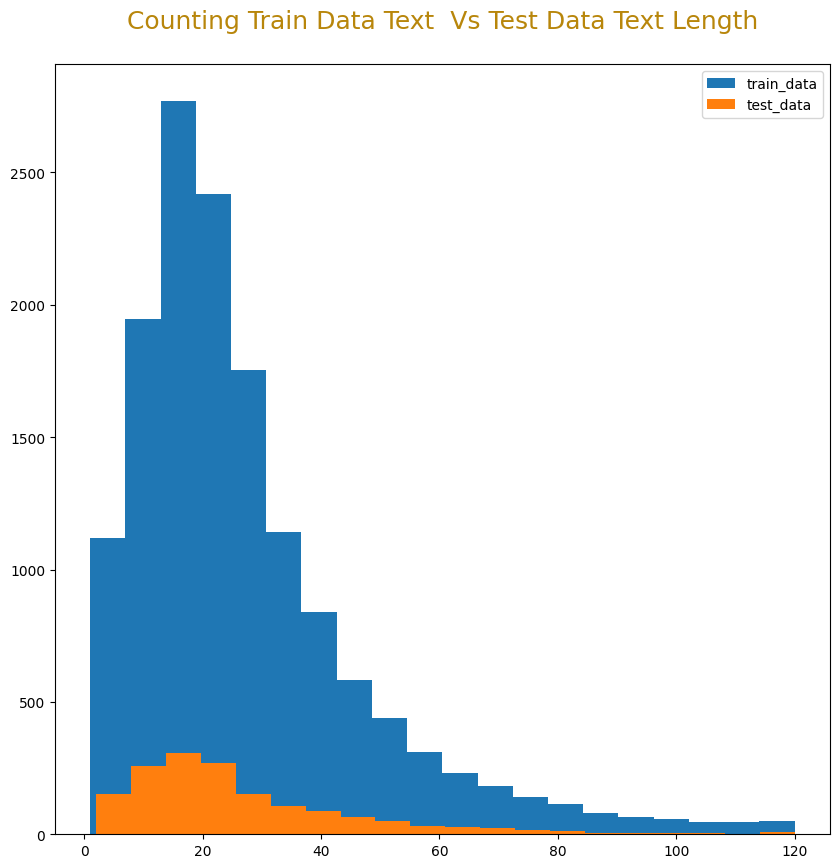

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(train_data_len, bins=20,label='train_data')
plt.hist(test_data_len , bins=20, label='test_data')
plt.title("Counting Train Data Text  Vs Test Data Text Length\n",fontsize=18,color="darkgoldenrod")
plt.legend()
plt.show()

All Tweet Text Data WordCloud

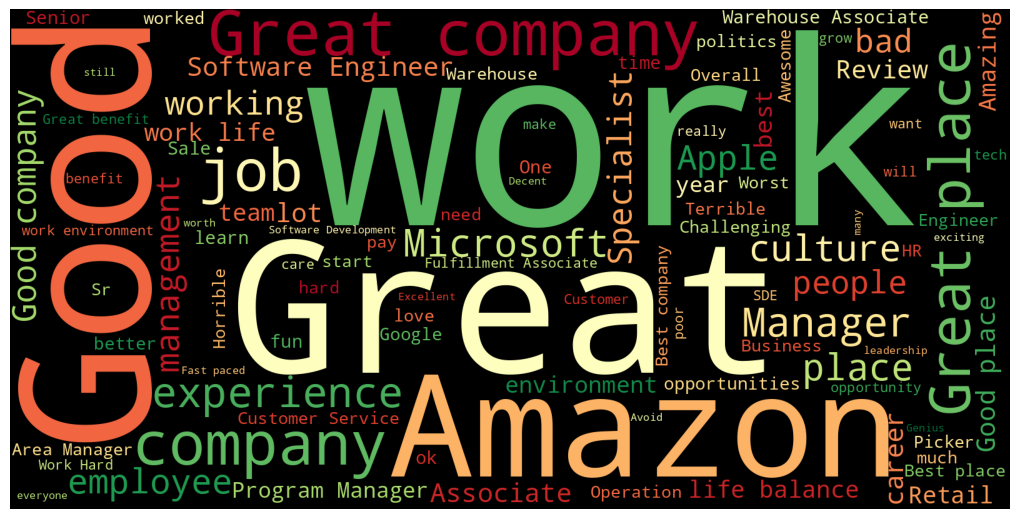

In [ ]:
all_tweet_text=" ".join(train_data["review"].tolist())
plt.figure(figsize=(10,10))
wordcloud=WordCloud(stopwords=stopword,width=1600,height=800,max_words=100,colormap='RdYlGn').generate(all_tweet_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.show()

Positive Data Wordcloud

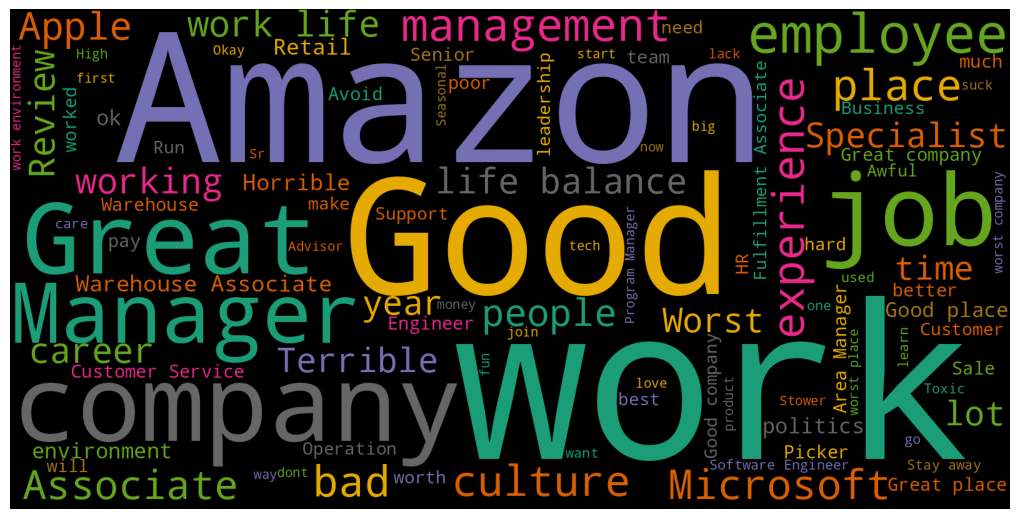

In [ ]:
positive_data=train_data[train_data.rating==0]
positive_tweet_text=" ".join(positive_data["review"].tolist())
plt.figure(figsize=(10,10))
wordcloud=WordCloud(stopwords=stopword,width=1600,height=800,max_words=100,colormap='Dark2').generate(positive_tweet_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.show()

Most Frequent Words In Train Data

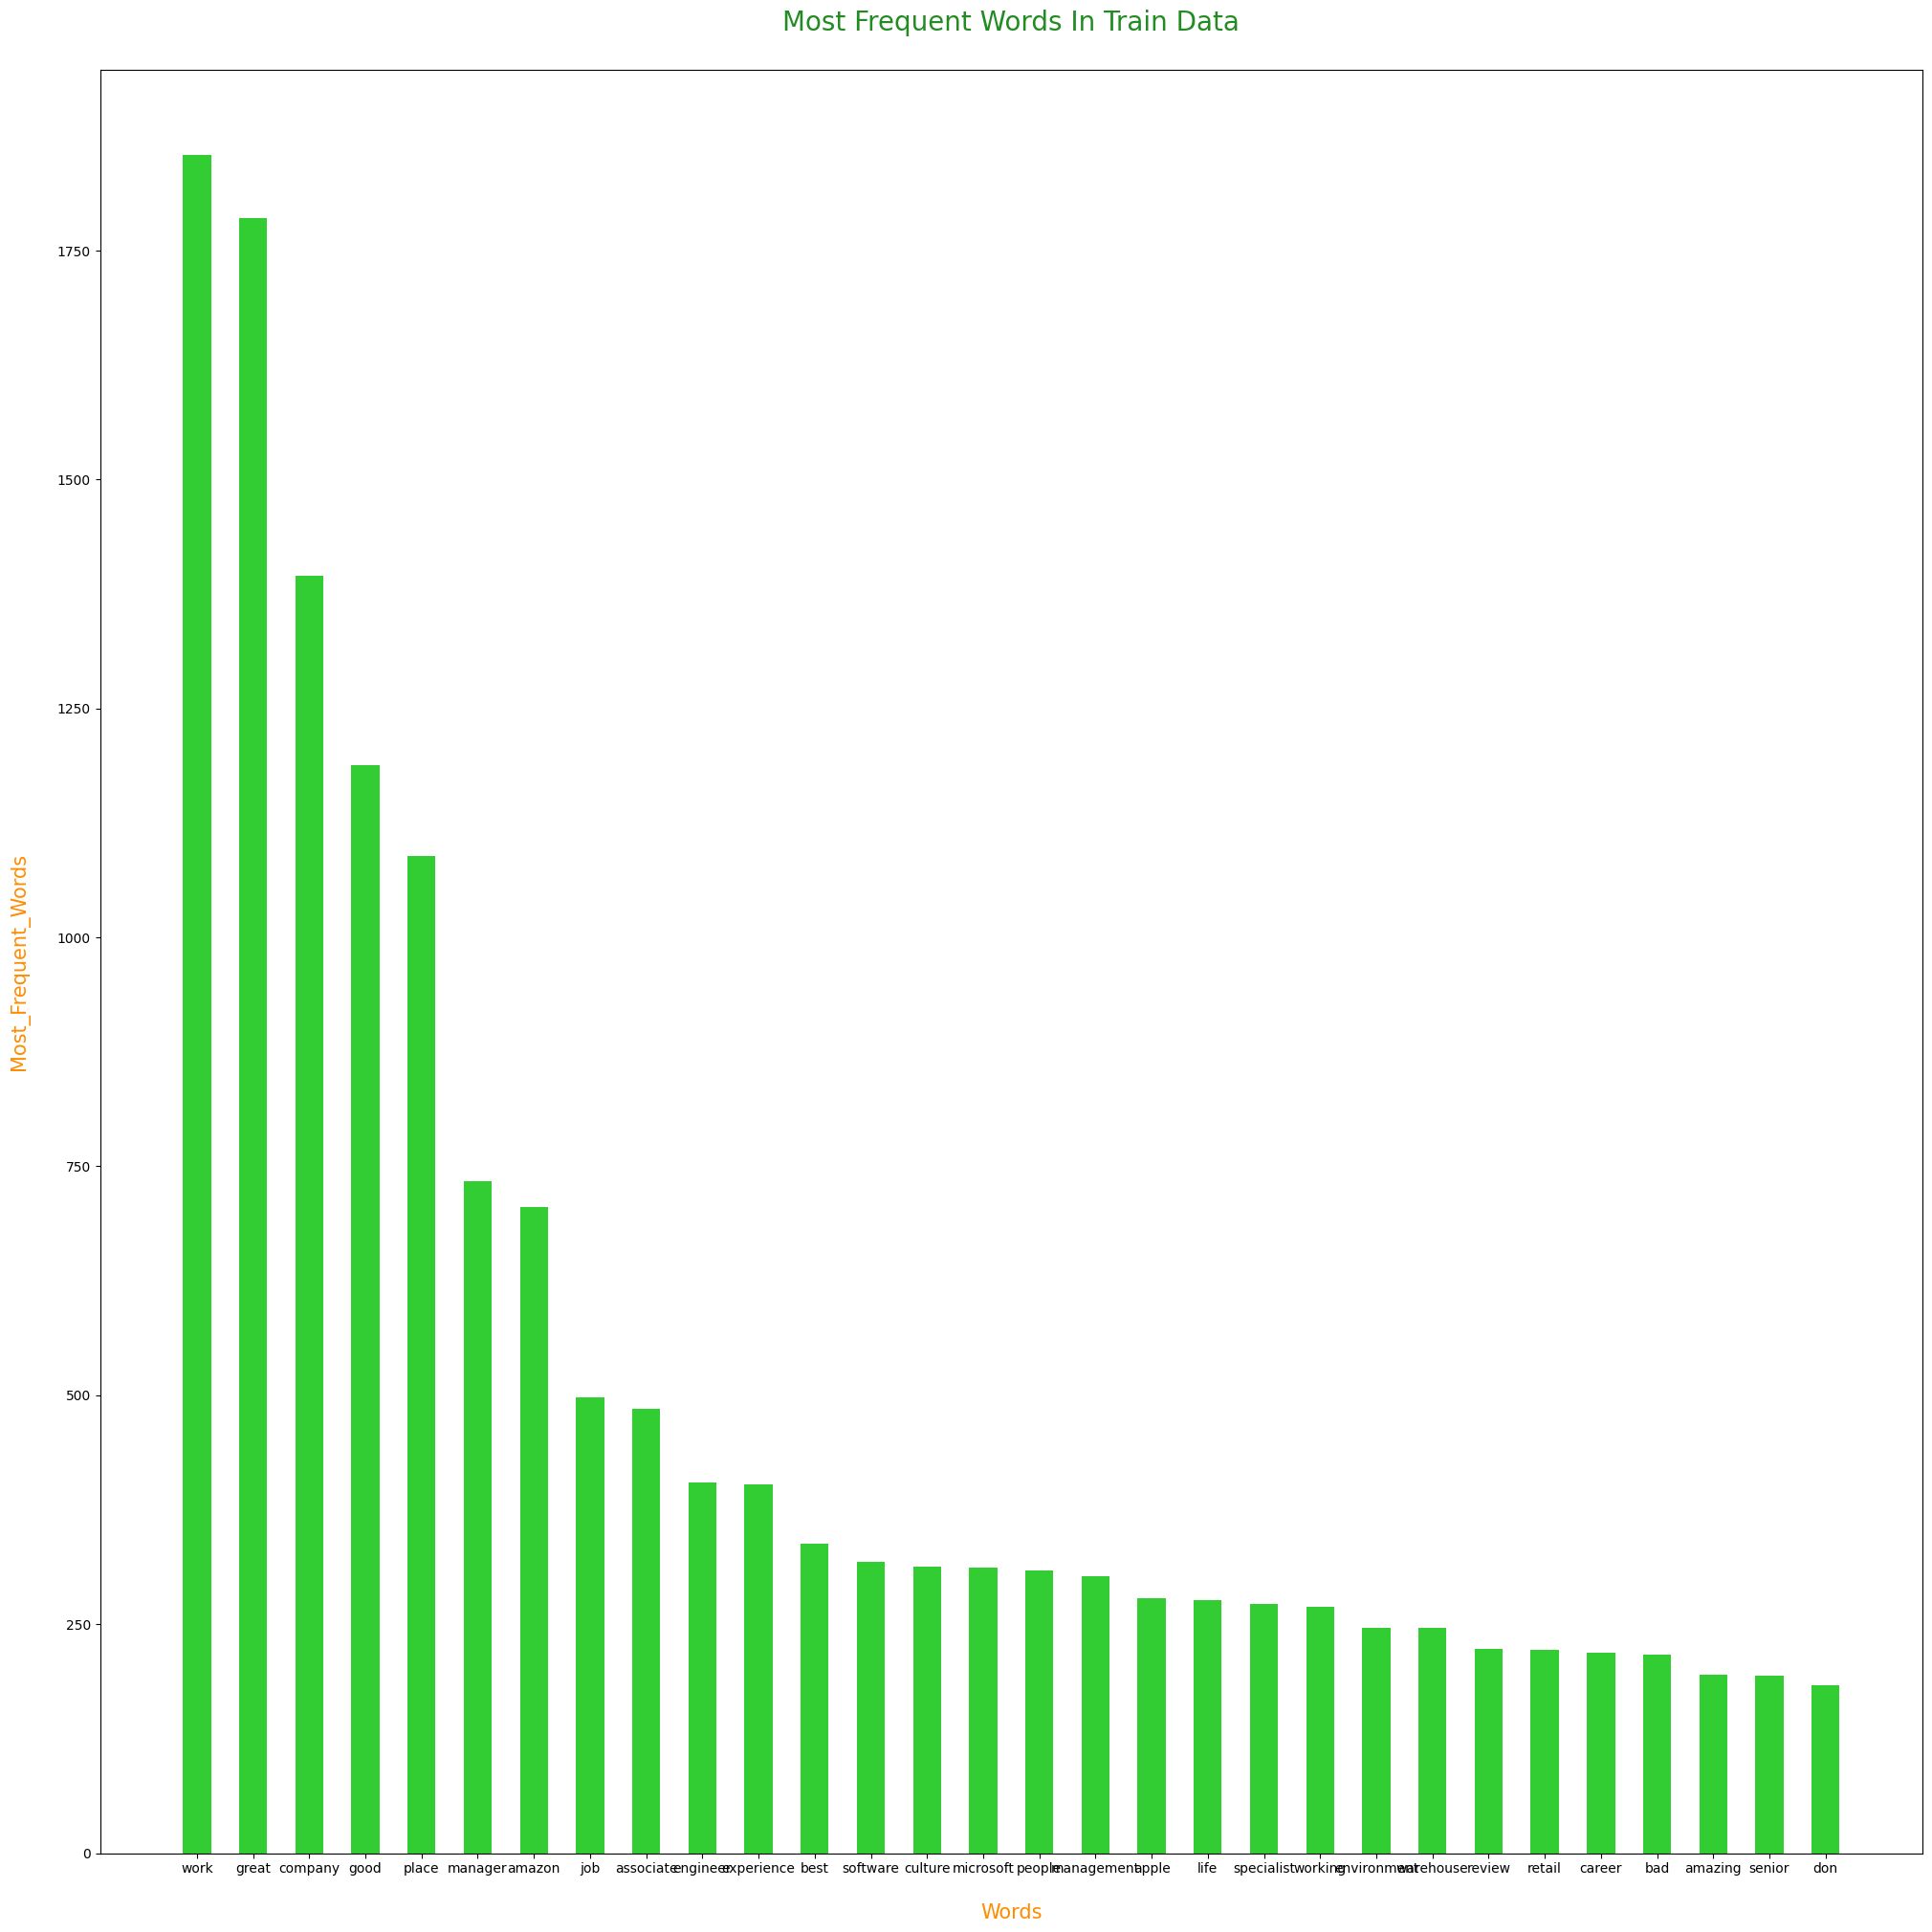

In [ ]:
plt.figure(figsize=(20,20))
count_vectorizer=CountVectorizer(stop_words="english")
word=count_vectorizer.fit_transform(train_data.review)
sum_words=word.sum(axis=0)
most_freq_words=[(all_word,sum_words[0,i]) for all_word,i in count_vectorizer.vocabulary_.items()]
most_freq_words=sorted(most_freq_words,key=lambda x:x[1],reverse=True)

frequent_words=pd.DataFrame(most_freq_words,columns=["Words","Most_Frequent_Words"])

word_list = list(frequent_words.head(30).Words)
word_value_list = list(frequent_words.head(30).Most_Frequent_Words)

plt.bar(word_list, word_value_list, color ="limegreen",width=0.5)
plt.xlabel("\nWords",fontsize=15,color="darkorange")
plt.ylabel("Most_Frequent_Words\n",fontsize=15,color="darkorange")
plt.title("Most Frequent Words In Train Data\n",fontsize=20,color="forestgreen")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
max_len=128
text_data=train_data["review"]
label_data=train_data["rating"]

In [ ]:
print("Length of Text Data :",len(text_data))
print("Length of Label Data :",len(label_data))

Length of Text Data : 14334
Length of Label Data : 14334


roberta_tokenizer

In [ ]:
roberta_tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

roberta_model

In [ ]:
roberta_model = TFRobertaModel.from_pretrained("roberta-base")

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Create Roberta Model

In [ ]:
def Create_Roberta_Model():
    input_ids=tf.keras.Input(shape=(max_len,),dtype="int32")
    attention_masks=tf.keras.Input(shape=(max_len,),dtype="int32")
    
    roberta_model = TFRobertaModel.from_pretrained("roberta-base")
    output_dim = roberta_model(input_ids=input_ids, attention_mask=attention_masks)[0][:,0,:]
    
    dense_layer = tf.keras.layers.Dense(128, activation="relu")(output_dim)
    dropout = tf.keras.layers.Dropout(0.5)(dense_layer)
    final_layer = tf.keras.layers.Dense(2, activation='softmax')(dropout)

    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=final_layer)
    
    return model

In [ ]:
model=Create_Roberta_Model()
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

optimizer = tf.keras.optimizers.Adam(lr=1e-5)

model.compile(loss=loss,optimizer=optimizer, metrics=["accuracy"])

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [ ]:
text_data[1000]

'Great place to learn quickly'

In [ ]:
encode_data=roberta_tokenizer.encode_plus(text_data[1000],add_special_tokens = True,max_length =60,pad_to_max_length = True,truncation=True)

In [ ]:
encode_data

{'input_ids': [0, 19065, 317, 7, 1532, 1335, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

In [ ]:
test_input_id=np.asarray(encode_data['input_ids'])
test_attention_mask=np.asarray(encode_data['attention_mask'])
output_data=roberta_model([test_input_id.reshape(1,-1),test_attention_mask.reshape(1,-1)])
type(output_data)

transformers.modeling_tf_outputs.TFBaseModelOutputWithPoolingAndCrossAttentions

In [ ]:
roberta_tokenizer.decode(encode_data["input_ids"])

'<s>Great place to learn quickly</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>'

In [ ]:
final_text_data=train_data["review"]
final_label_data=np.array(label_data)

In [ ]:
def roberta_encode(final_text_data,max_len):
    input_ids=[]
    attention_masks=[]
    
    for i in range(len(final_text_data)):
        encode_data=roberta_tokenizer.encode_plus(final_text_data[i],add_special_tokens=True,max_length=max_len,pad_to_max_length=True,return_attention_mask=True)
        input_ids.append(encode_data['input_ids'])
        attention_masks.append(encode_data["attention_mask"])
    return np.array(input_ids),np.array(attention_masks)
        

In [ ]:
text_input_ids,text_attention_masks = roberta_encode(final_text_data,max_len)

In [ ]:
print('Text Input Ids Shape {} \nText Input Attention Mask Shape {} \nLabel Data shape {}'.format(text_input_ids.shape,text_attention_masks.shape,final_label_data.shape))

Text Input Ids Shape (14334, 128) 
Text Input Attention Mask Shape (14334, 128) 
Label Data shape (14334,)


In [ ]:
X_train_input,X_test_input,Y_train_label,Y_test_label,train_mask,test_mask=train_test_split(text_input_ids,final_label_data,text_attention_masks,test_size=0.1,random_state=42,shuffle=True)

In [ ]:
print('Train input shape {}\nTest input shape {}\nTrain label shape {}\nTest label shape {}\nTrain attention mask shape {}\nTest attention mask shape {}'.format(X_train_input.shape,X_test_input.shape,Y_train_label.shape,Y_test_label.shape,train_mask.shape,test_mask.shape))

Train input shape (12900, 128)
Test input shape (1434, 128)
Train label shape (12900,)
Test label shape (1434,)
Train attention mask shape (12900, 128)
Test attention mask shape (1434, 128)


In [ ]:
history=model.fit([X_train_input,train_mask],Y_train_label,batch_size=32,epochs=10,validation_data=([X_test_input,test_mask],Y_test_label))

Epoch 1/10
404/404 [==============================] - 328s 811ms/step - loss: 0.6932 - accuracy: 0.5043 - val_loss: 0.6934 - val_accuracy: 0.4833
Epoch 2/10
404/404 [==============================] - 314s 777ms/step - loss: 0.6932 - accuracy: 0.5017 - val_loss: 0.6934 - val_accuracy: 0.4833
Epoch 3/10
404/404 [==============================] - 324s 803ms/step - loss: 0.7246 - accuracy: 0.4971 - val_loss: 0.6931 - val_accuracy: 0.5167
Epoch 4/10
404/404 [==============================] - 314s 776ms/step - loss: 0.6932 - accuracy: 0.4985 - val_loss: 0.6935 - val_accuracy: 0.4833
Epoch 5/10
404/404 [==============================] - 322s 796ms/step - loss: 0.6932 - accuracy: 0.5012 - val_loss: 0.6935 - val_accuracy: 0.4833
Epoch 6/10
404/404 [==============================] - 322s 797ms/step - loss: 0.6932 - accuracy: 0.5030 - val_loss: 0.6932 - val_accuracy: 0.4833
Epoch 7/10
404/404 [==============================] - 322s 797ms/step - loss: 0.6932 - accuracy: 0.5044 - val_loss: 0.6932 -

In [ ]:
def model_loss_and_accuracy(history):
    
    fig=plt.figure(figsize=(15,15))
    plt.subplot(221)
    plt.plot(history.history["accuracy"],marker="o",linestyle=":",markersize=10,color="m",label="accuracy")
    plt.plot(history.history["val_accuracy"],marker="D",linestyle=":",markersize=10,color="b",label="val_accuracy")
    plt.title("Model Accuracy\n",fontsize=20,color="darkorange")
    plt.xlabel("Number of Epochs",color="midnightblue",fontsize=15)
    plt.ylabel("Accuracy",color="midnightblue",fontsize=15)
    plt.grid(color = 'green', linestyle = '--', linewidth = 1)
    plt.legend(loc="best")
    plt.tight_layout()
    
  
    plt.subplot(222)
    plt.plot(history.history["accuracy"],marker="v",linestyle="-.",markersize=10,color="g",label="accuracy")
    plt.plot(history.history["val_accuracy"],marker="s",linestyle="--",markersize=10,color="r",label="val_accuracy")
    plt.title("Model Loss\n",fontsize=20,color="limegreen")
    plt.xlabel("Number of Epochs",color="midnightblue",fontsize=15)
    plt.ylabel("Loss",color="midnightblue",fontsize=15)
    plt.grid(color = 'green', linestyle = '--', linewidth = 1)
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

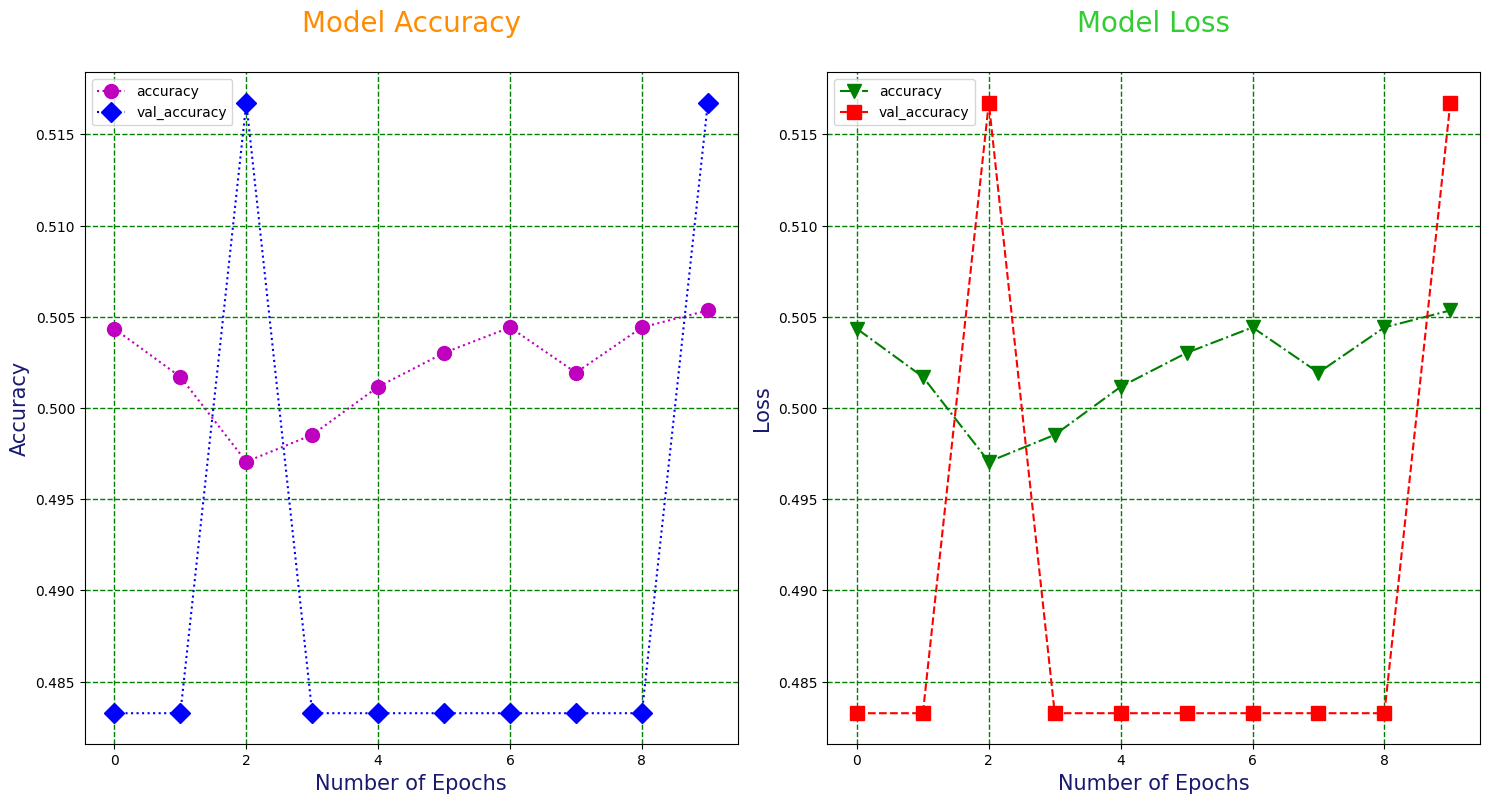

In [ ]:
model_loss_and_accuracy(history)

F1 Score

45/45 [==============================] - 12s 262ms/step


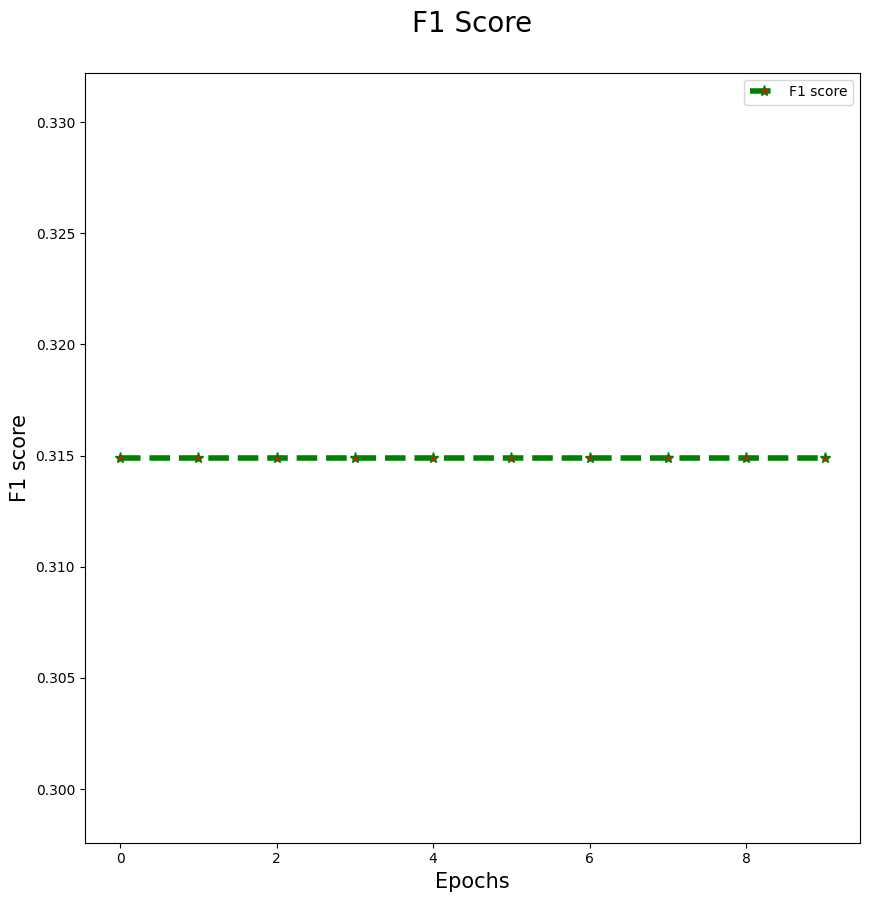

In [ ]:
def plot_f1_score(history):
    f1_scores = []
    for epoch in range(len(history.history['val_loss'])):
        model.set_weights(history.model.get_weights())
        predictions = model.predict([X_test_input, test_mask])
        predictions = [round(p[0]) for p in predictions]
    
        f1_scores.append(f1_score(Y_test_label, predictions, average='weighted'))
    plt.figure(figsize=(10,10))
    plt.plot(range(len(history.history['val_loss'])), f1_scores, label='F1 score',marker="*",color="g",linestyle="--",linewidth=4,markersize=8,markerfacecolor="r")
    plt.title("F1 Score\n",color="black",fontsize=20)
    plt.xlabel('Epochs',fontsize=15,color="black")
    plt.ylabel('F1 score',fontsize=15,color="black")
    plt.legend()
    plt.show()


plot_f1_score(history)

Accuracy Score

ROC AUC Score

In [ ]:
print("ROC AUC Score is {}".format(roc_auc_score(Y_test_label, pred[:,1])))

Average Precision Score

In [ ]:
# Get the predicted probabilities for the positive class
pred_probs = model.predict([X_test_input, test_mask])[:,1]

# Binarize the test labels
Y_test_binarized = (Y_test_label == 1).astype(int)

# Calculate the average precision score
average_precision = average_precision_score(Y_test_binarized, pred_probs)

print("Average Precision Score :", average_precision)

receiver operating characteristic curve

In [ ]:
pred_positive = pred[:,1]
fpr, tpr, thresholds = roc_curve(Y_test_label, pred_positive)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc,color="g",linestyle="--",marker="o",markersize=3,markerfacecolor="k")

plt.plot([0, 1], [0, 1],linestyle="--",linewidth=3,color="m")  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Calculate precision, recall and thresholds
precision, recall, thresholds = precision_recall_curve(Y_test_label,pred[:,1])

# Plot the PR curve
plt.figure(figsize=(10,10))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color="darkmagenta")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve\n',fontsize=20,color="black")
plt.xlabel("Recall",fontsize=15,color="violet")
plt.ylabel("Precision",fontsize=15,color="darkgreen")
plt.show()

In [ ]:
# Encode the labels
label_encoder=LabelEncoder()
label_encoder.fit(Y_test_label)
test_label_data=label_encoder.transform(Y_test_label)
classes=label_encoder.classes_
colors = ["navy", "darkorange"]
plt.figure(figsize=(10,10))

# Compute the ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = dict()
for i, class_ in enumerate(classes):
    # Binarize the label data
    label_binarized = (test_label_data == i).astype(int)
    fpr[i], tpr[i], _ = roc_curve(label_binarized, pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curve for each class
    plt.plot(fpr[i], tpr[i], label='%s ROC Curve Class  (AUC=%0.2f)' % (class_, roc_auc[i]), marker=">", color=colors[i])

plt.plot([0,1],[0,1], marker="H", color="k", linestyle="--", linewidth=4)
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Compute The ROC Curve And AUC For Each Class', color="black", fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))

cf_matrix=confusion_matrix(Y_test_label,prediction)
label_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
label_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
label_names = ["True Positive","False Positive","False Negative","True Negative"]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(label_names,label_counts,label_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='gist_ncar',xticklabels=label_name,yticklabels=label_name)
plt.title("Confusion Matrix\n",color="gold",fontsize=20)
plt.ylabel("True Label\n",fontsize=15,color="yellow")
plt.xlabel("\nPredicted Label",fontsize=15,color="yellow")
plt.show()

In [ ]:
print(classification_report(Y_test_label,prediction,target_names=label_name))